In [19]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter


In [20]:
# Load train + test to do EDA on full dataset
with open("../data/train_split.json", "r", encoding="utf-8") as f:
    train_data = json.load(f)
with open("../data/test_split.json", "r", encoding="utf-8") as f:
    test_data = json.load(f)

# Combine into one DataFrame
df = pd.DataFrame(train_data + test_data)
df['label'] = df['label'].astype('category')
df.head()


,text,label,label_id
0,What's the process for reporting harassment?,needs_rag,0
1,I’m feeling really motivated by my team!,no_rag,1
2,How do I request a reference from HR?,needs_rag,0
3,I'm struggling to balance work and personal life,no_rag,1
4,You make the workplace feel like a second family,no_rag,1


C:\Users\Omar\AppData\Local\Temp\ipykernel_19328\3520017845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", palette="Set2")


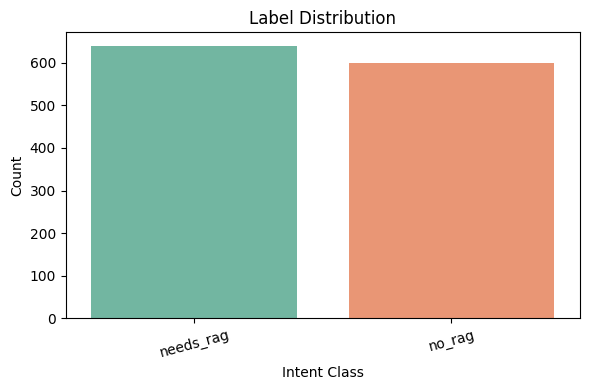

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="label", palette="Set2")
plt.title("Label Distribution")
plt.xlabel("Intent Class")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


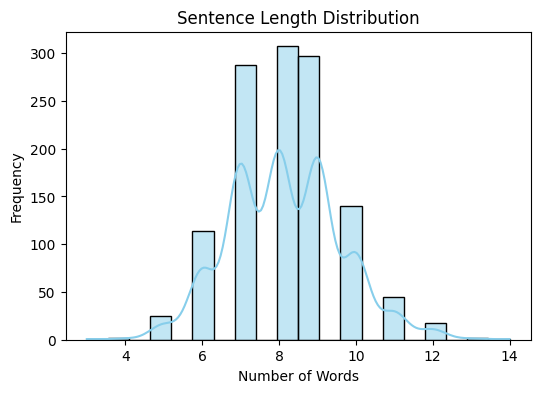

In [22]:
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(6,4))
sns.histplot(df['text_length'], bins=20, kde=True, color='skyblue')
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


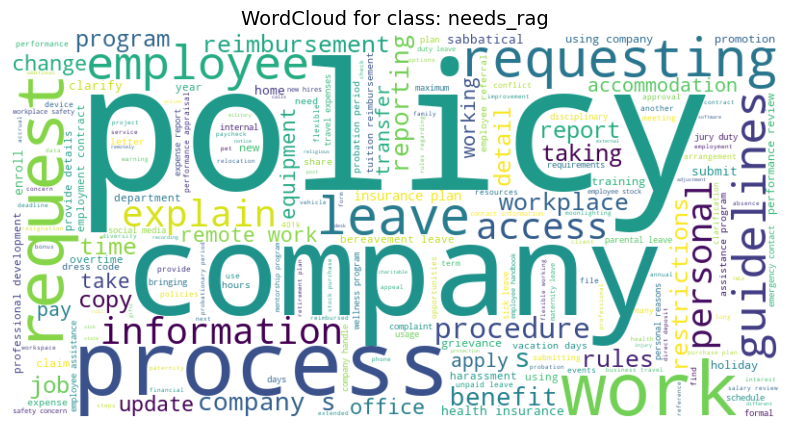

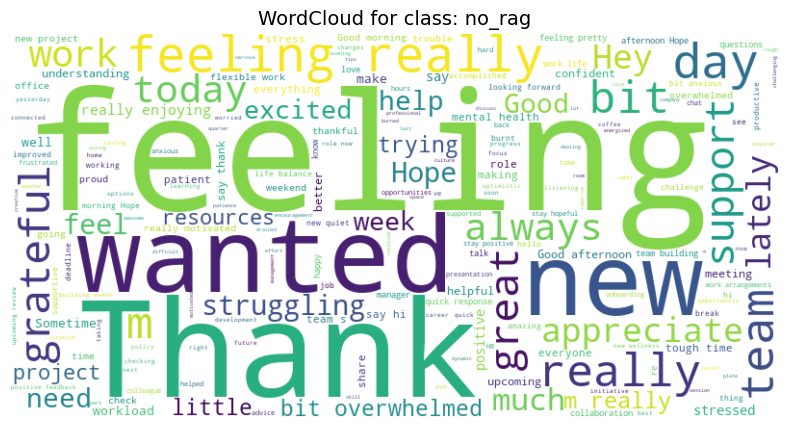

In [23]:
for label in df['label'].unique():
    texts = " ".join(df[df['label'] == label]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texts)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"WordCloud for class: {label}", fontsize=14)
    plt.axis("off")
    plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Omar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Omar\AppData\Local\Temp\ipykernel_19328\1169966090.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette="viridis")


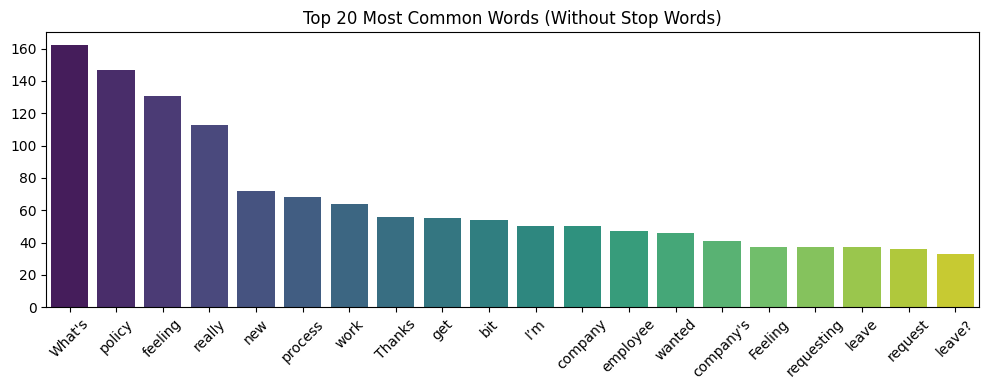

In [24]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Download stopwords if not already
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Preprocess and remove stopwords
cleaned_texts = df['text'].apply(lambda x: " ".join(
    word for word in x.split() if word.lower() not in stop_words
))

# Flatten into a single list of words
all_words = " ".join(cleaned_texts).split()

# Count word frequencies
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Plot
words, freqs = zip(*common_words)
plt.figure(figsize=(10,4))
sns.barplot(x=list(words), y=list(freqs), palette="viridis")
plt.title("Top 20 Most Common Words (Without Stop Words)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
!pip install textblob

C:\Users\Omar\AppData\Local\Temp\ipykernel_19328\1988452727.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="label", y="sentiment", palette="coolwarm")


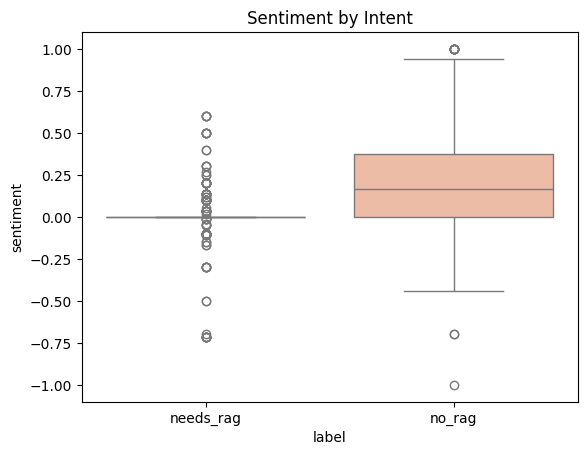

In [26]:
from textblob import TextBlob

df["sentiment"] = df["text"].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.boxplot(data=df, x="label", y="sentiment", palette="coolwarm")
plt.title("Sentiment by Intent")
plt.show()


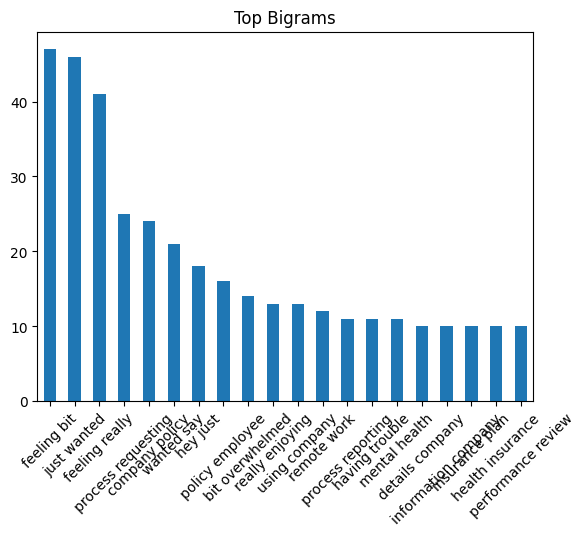

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words="english", max_features=20)
X = vectorizer.fit_transform(df["text"])
bigrams = vectorizer.get_feature_names_out()
counts = X.sum(axis=0).A1
pd.Series(counts, index=bigrams).sort_values(ascending=False).plot(kind="bar", title="Top Bigrams")
plt.xticks(rotation=45)
plt.show()
